> **Prediction whether the person will suffer Diabetes or not**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing the Dataset

In [3]:

df = pd.read_csv('diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Check for Null Values

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking for any missing values with the help of 'value_counts()' function

In [5]:
for i in df.columns:
  print(df[i].value_counts())
  print()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16


Checking the dependence of 'Outcome' variable on other columns with 'countplot( )'

In [6]:
import seaborn as sns
def countplt_fn(x,y,series,xsize,ysize,xtick):
  plt.figure(figsize=(xsize,ysize))
  sns.countplot(series[x], hue=series[y])
  plt.xticks(rotation=xtick)
  plt.show


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


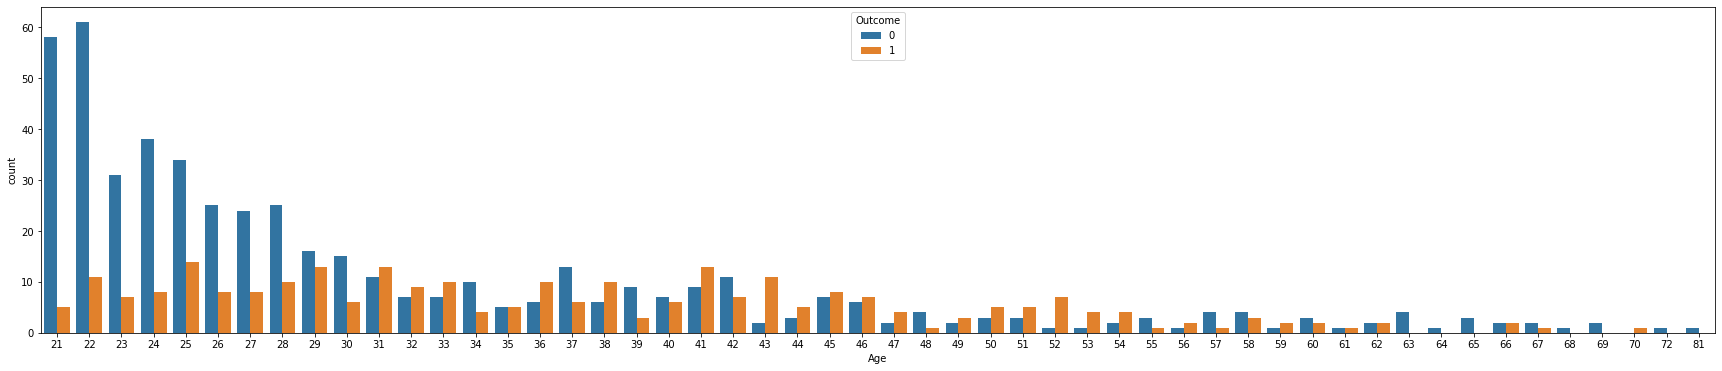

In [7]:
countplt_fn('Age','Outcome',df,30,6,0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


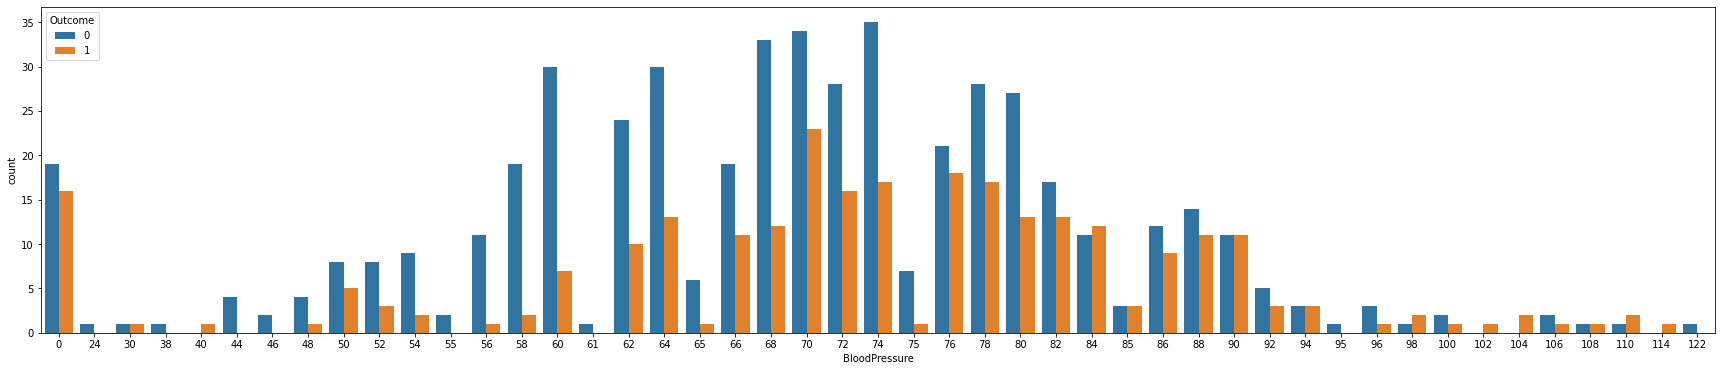

In [8]:
countplt_fn('BloodPressure','Outcome',df,30,6,0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


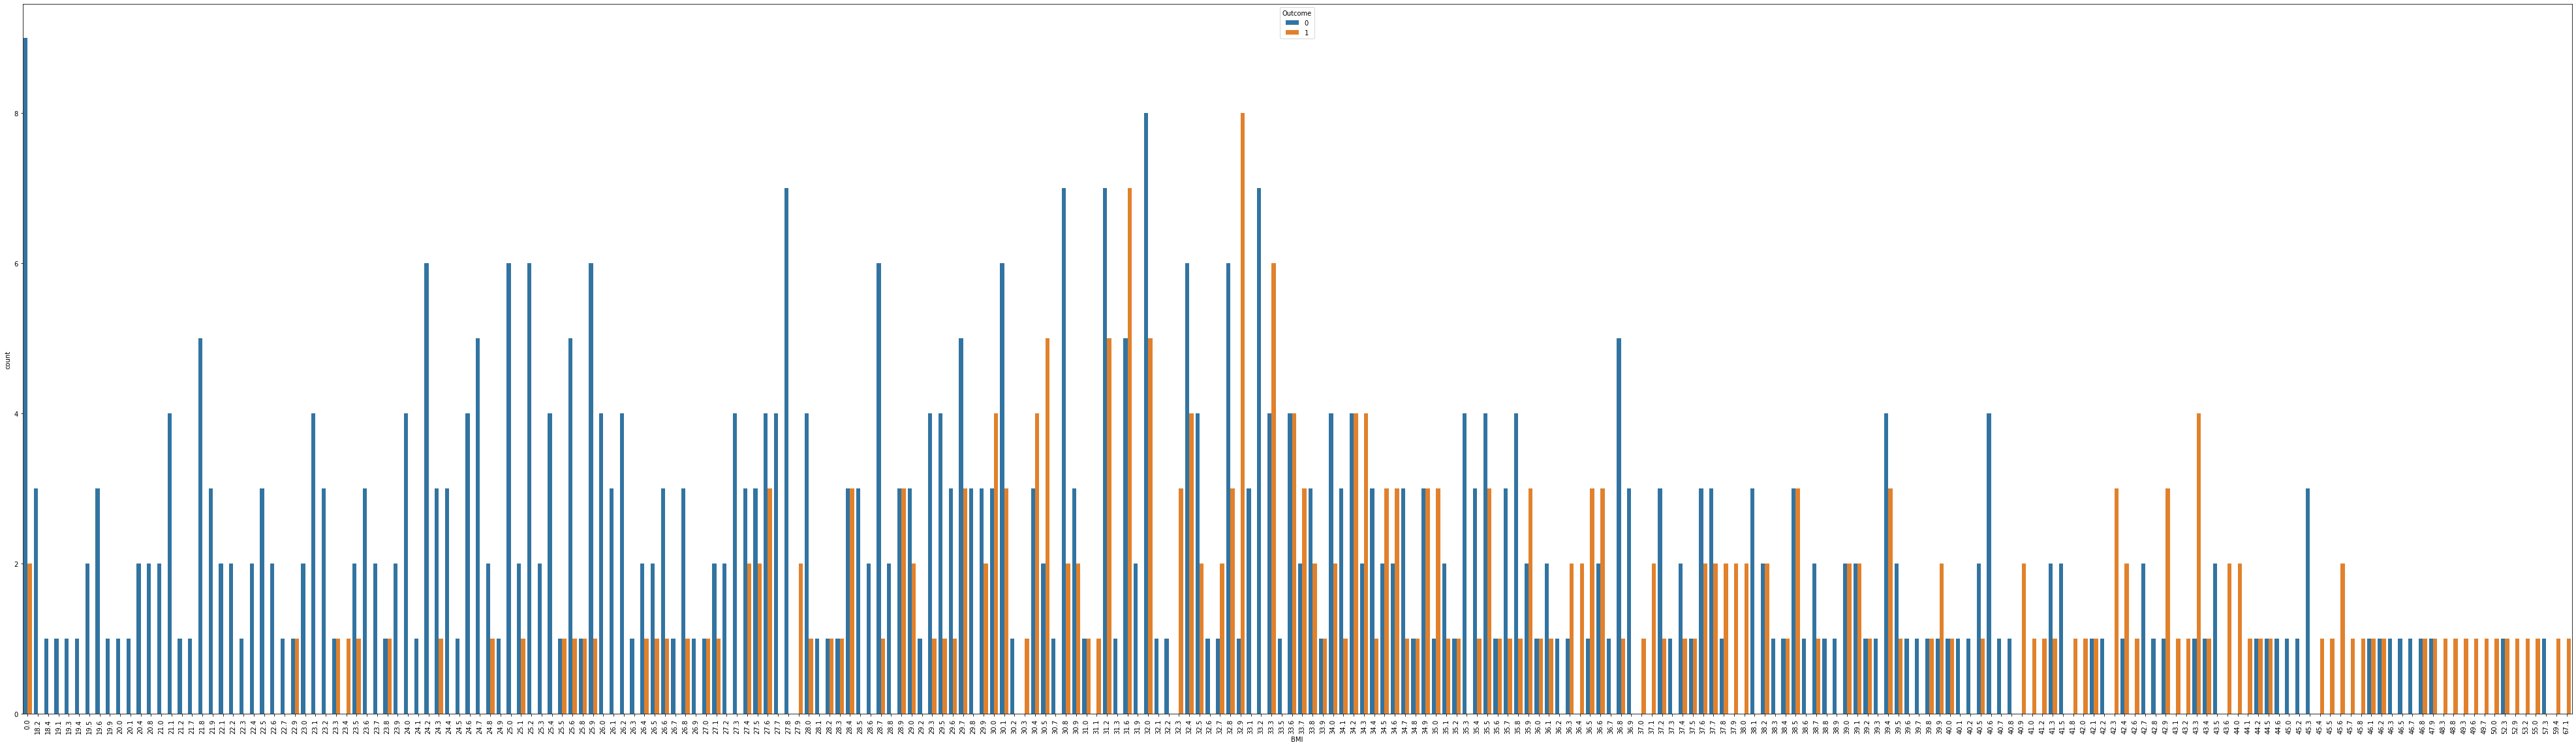

In [9]:
countplt_fn('BMI','Outcome',df,70,20,90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


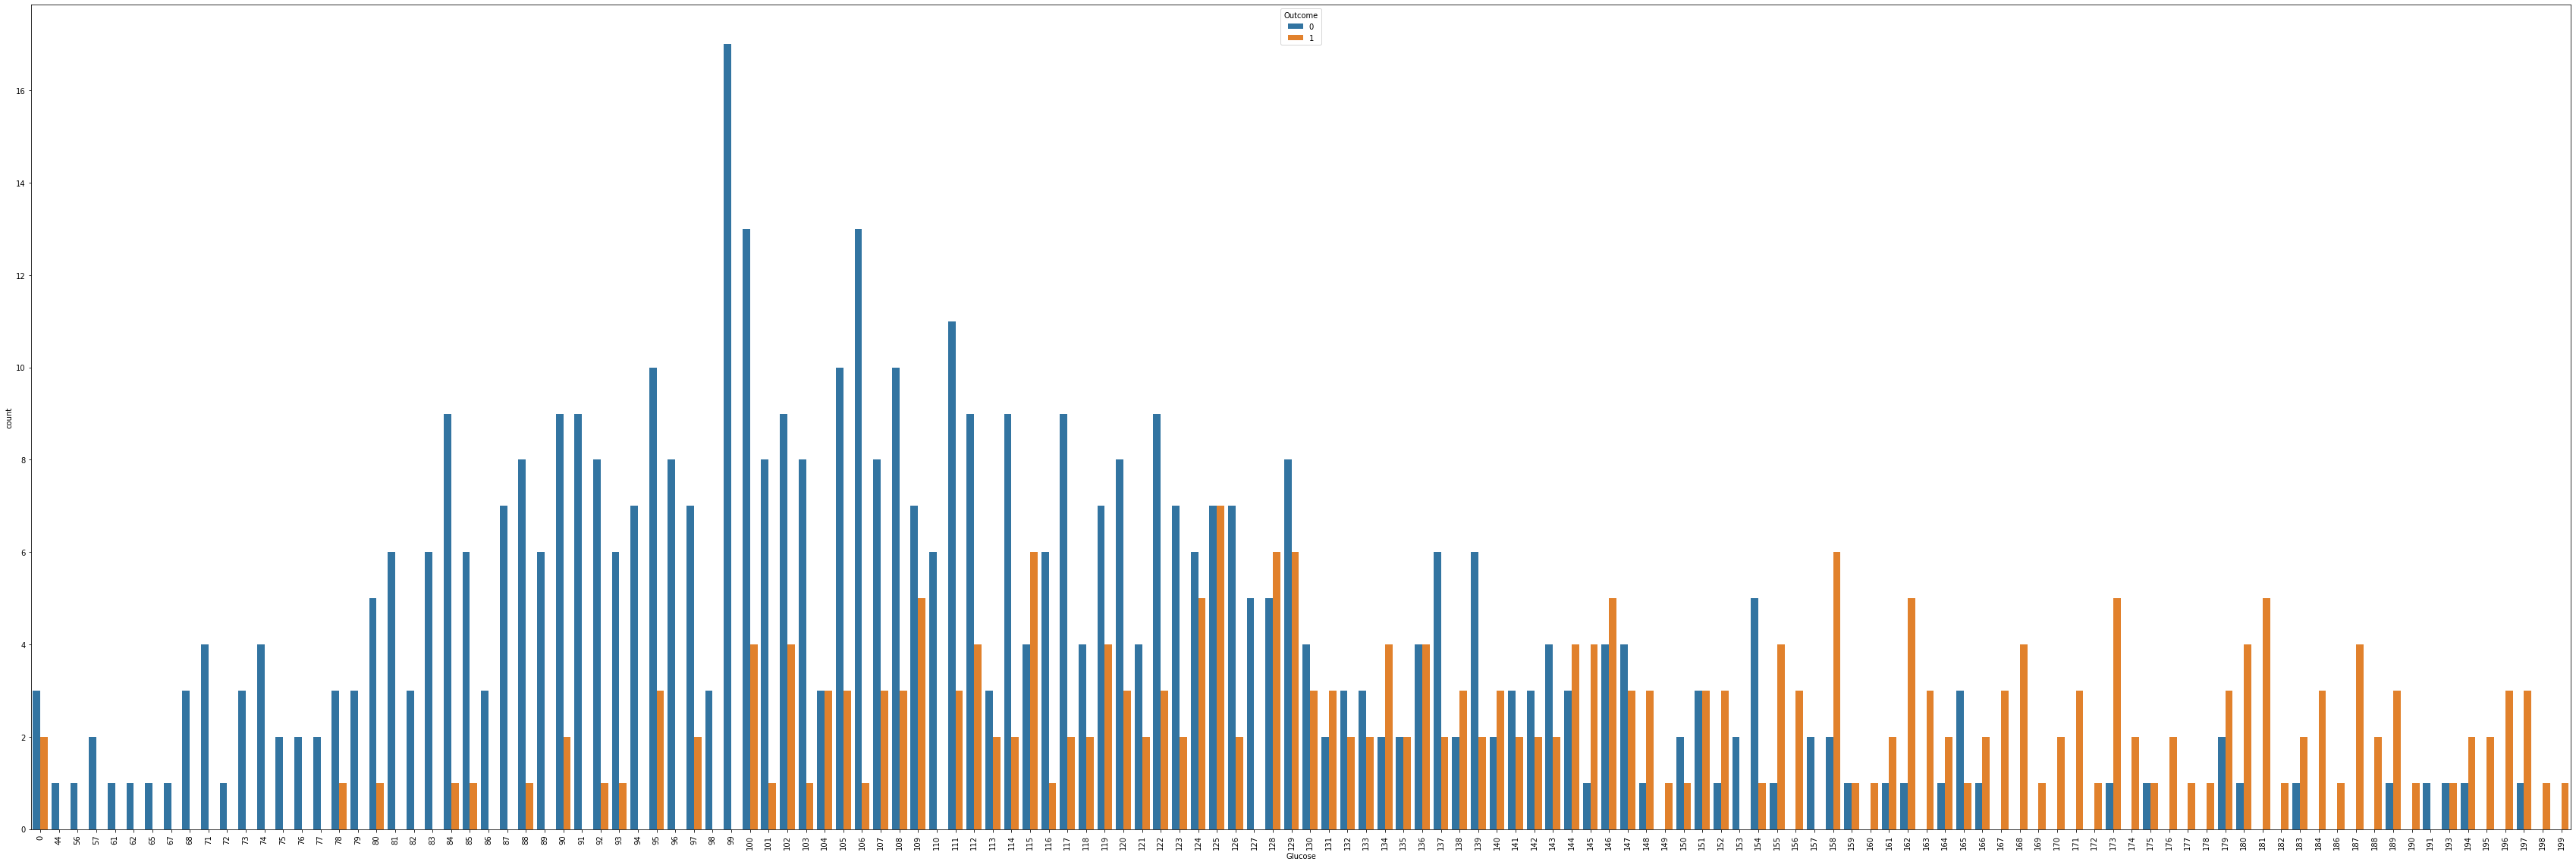

In [10]:
countplt_fn('Glucose','Outcome',df,60,20,90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


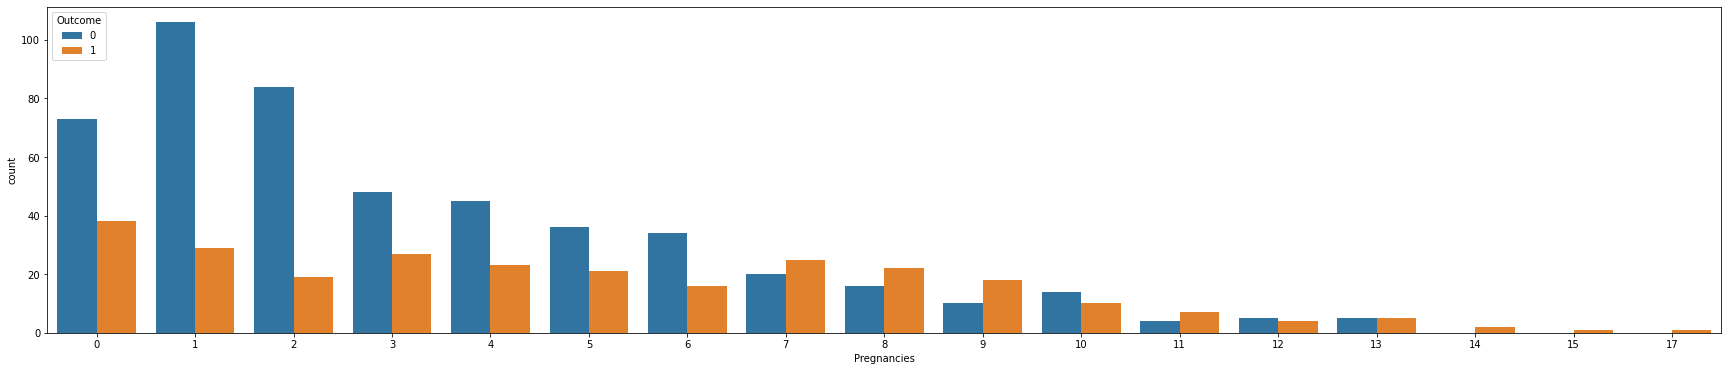

In [11]:
countplt_fn('Pregnancies','Outcome',df,30,6,0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


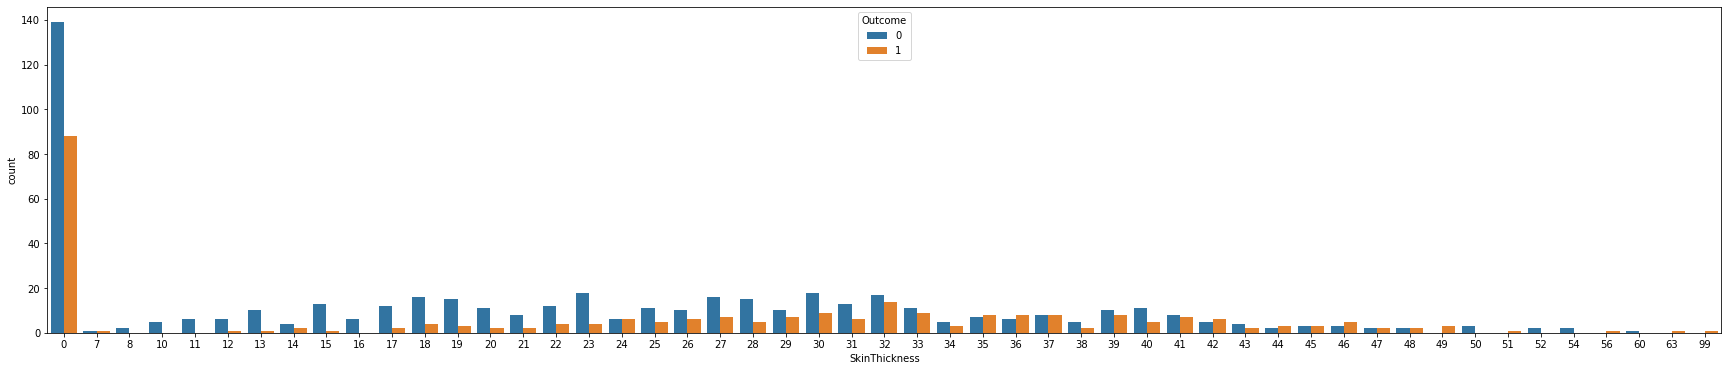

In [12]:
countplt_fn('SkinThickness','Outcome',df,30,6,0)

From above plots, it is clear that the 'Outcome' is not much dependent on 'SkinThickness' variable

Splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

In [14]:
x = df.drop(columns='Outcome')
y = df['Outcome']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.33, random_state = 42)

Sacling the dataset with the help of StandardScaler()

In [16]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [17]:
x_train = pd.DataFrame(x_train)

In [18]:
x_test = pd.DataFrame(x_test)

Fitting the model

In [19]:
lgr =LogisticRegression()
rfe = RFE(lgr,7) #7 are sufficient for prediction
rfe.fit(x_train,y_train)
rfe_features = list(x_train.columns[rfe.support_])
rfe_x_train = x_train[rfe_features]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Out of 8 variables, 7 are sufficient enough to predict the Outcome as it gives the best F1 Score

Building the Logistic Regression model using the features selected by RFE

In [20]:
lgr_1 = LogisticRegression()
lgr_1.fit(rfe_x_train,y_train)

LogisticRegression()

Predicting the values

In [21]:
#F1 scores==> {[8 : 0.80938416, 0.61077844], [7: 0.80938416, 0.61077844], [6: 0.80351906, 0.5988024] }
y_pred = lgr_1.predict(x_test[rfe_features])
f1_score_array = f1_score(y_test,y_pred, average=None)
dict_rfe = {"Features": list(rfe_features), "F1 Score":f1_score_array}
dict_rfe

{'Features': [0, 1, 2, 4, 5, 6, 7],
 'F1 Score': array([0.80938416, 0.61077844])}

Implementing the model

In [22]:
features = []
for i in list(rfe_features):
  #print(df.columns[i])
  features.append(df.columns[i])
X = df[features]
Y = df['Outcome']

In [23]:
#features selected by the model
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Logistic Regression Model Fitting

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((460, 7), (308, 7), (460,), (308,))

In [25]:
#scaling
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [26]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

Predicting the result and checking the accuracy

In [27]:
Y_pred = LR.predict(X_test)
print("Accuracy of Logistic Regression Model is {:.2f}".format(LR.score(X_test,Y_test)))

Accuracy of Logistic Regression Model is 0.75


Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[169  37]
 [ 39  63]]


Incorrect predictions

In [29]:
inc_pred = (Y_test != Y_pred).sum()
inc_pred

76

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       206
           1       0.63      0.62      0.62       102

    accuracy                           0.75       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.75      0.75      0.75       308



In [31]:
#reshaping
Y_train = Y_train.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

ROC Curve

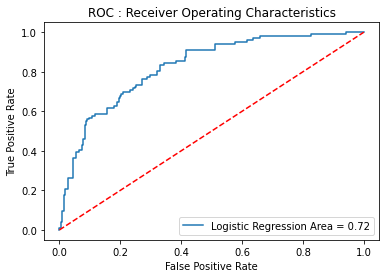

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_score = roc_auc_score(Y_test,LR.predict(X_test))
fpr, tpr, thr = roc_curve(Y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression Area = {:.2f}'.format(roc_score))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Receiver Operating Characteristics')
plt.legend()
plt.show()

**Conclusion:** Thus, we can predict whether the preson has diabetes or  not with the help of Logistic Regression. The model is working with 75% accuracy.